In [1]:
import pandas as pd
df = pd.read_csv('Application_Data.csv')
df.head().style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'}).hide(axis='index')

Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
5008806,M,1,1,0,112500,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,59,4,0,30,1
5008808,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,5,1
5008809,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,5,1
5008810,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,27,1
5008811,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,39,1


In [2]:
print('\033[93m\033[1m'+'.: Imported Dataset Info :.'+'\033[0m')
print('\033[93m*' * 28+'\033[0m')
print('Total Rows:'+'\033[93m\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[93m\033[1m', df.shape[1])
print('\033[0m\033[93m'+'*' * 28+'\033[0m')
print('\n')

# --- Print Dataset Detail ---
print('\033[93m\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('\033[0m\033[93m'+'*' * 22+'\033[0m')
df.info(memory_usage = False)

.: Imported Dataset Info :.
****************************
Total Rows: 25128
Total Columns: 21
****************************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone      

In [3]:
df.isna().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

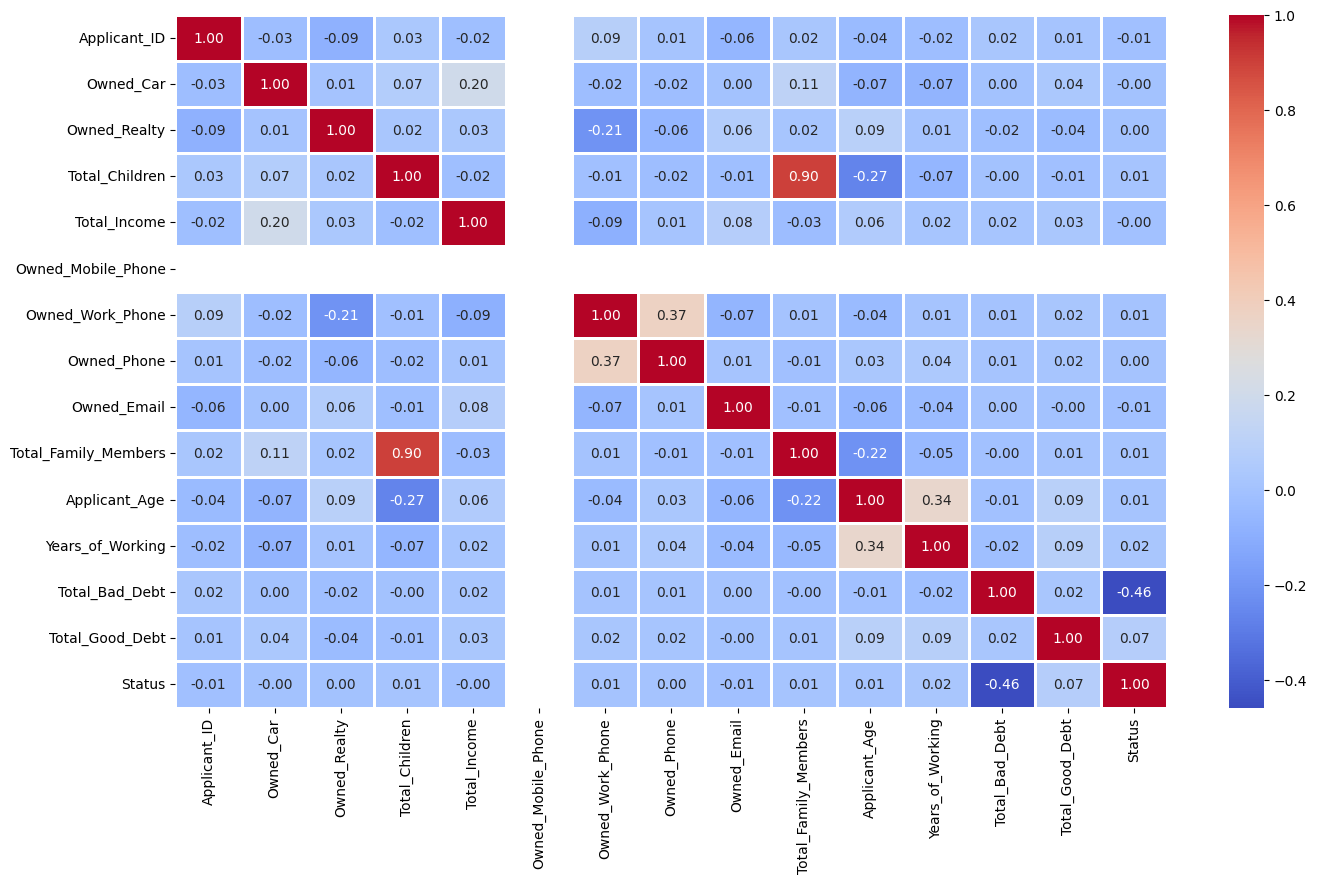

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 9))
sns.heatmap(data=df[numerical_features].corr(), annot=True, linewidths=1, fmt='.2f', cmap='coolwarm')
plt.show()

<Axes: xlabel='Status', ylabel='count'>

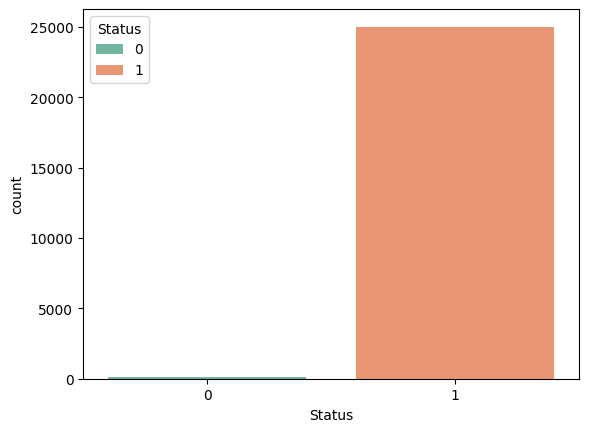

In [5]:
sns.countplot(x='Status', data=df, hue='Status', palette='Set2')

In [6]:
# --- Create Prediction & Modeling Data ---
df_modeling = df.sample(frac=0.9, random_state=42)
df_unseen = df.drop(df_modeling.index)
df_modeling.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)

# --- Shape of Modeling & Prediction Data ---
print('\033[93m\033[1m'+'.: Data for Modeling :.'+'\033[0m')
print('\033[93m*' * 24+'\033[0m')
print('Total Observations / Total columns: ' + str(df_modeling.shape))
print('\n')
print('\033[93m\033[1m'+'.: Data for Predictions (Unseen) :.'+'\033[0m')
print('\033[93m*' * 36+'\033[0m')
print('Total Observations / Total Columns: ' + str(df_unseen.shape))

.: Data for Modeling :.
************************
Total Observations / Total columns: (22615, 21)


.: Data for Predictions (Unseen) :.
************************************
Total Observations / Total Columns: (2513, 21)


In [7]:
from sklearn.model_selection import train_test_split

target = "Status"

categorical_features = [
    "Applicant_Gender",
    "Owned_Car",
    "Owned_Realty",
    "Income_Type",
    "Education_Type",
    "Family_Status",
    "Housing_Type",
    "Owned_Mobile_Phone",
    "Owned_Work_Phone",
    "Owned_Phone",
    "Owned_Email",
    "Job_Title",
]

ignore_features = ["Applicant_ID"]

X = df_modeling.drop(columns=[target] + ignore_features)
y = df_modeling[target]
numerical_features = [col for col in X.columns if col not in categorical_features]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [8]:
X_train.head()

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
7370,F,0,1,2,135000,Working ...,Secondary / secondary special ...,Separated ...,House / apartment ...,1,0,0,0,Core staff ...,3,41,7,3,13
7313,M,1,1,0,900000,Working ...,Higher education ...,Married ...,House / apartment ...,1,0,0,0,Drivers ...,2,53,4,0,46
10881,F,0,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,1,0,0,1,Cleaning staff ...,2,47,3,0,4
814,F,0,0,1,144000,Working ...,Secondary / secondary special ...,Single / not married ...,Rented apartment ...,1,1,1,0,High skill tech staff ...,2,40,10,0,33
15994,M,0,0,0,90000,Working ...,Secondary / secondary special ...,Widow ...,Municipal apartment ...,1,1,1,0,Sales staff ...,1,55,10,4,14


In [9]:
from sklearn.pipeline import Pipeline as SciPipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sampling_strategy = {
    0: 20000,
    1: 20000,
}

continuous_features = numerical_features

scaling_transformer = SciPipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    # ('scaler', StandardScaler()),
])

# preprocessor = ColumnTransformer(transformers=[
#     ('scaling_transformer', scaling_transformer, continuous_features),
# ], remainder='passthrough', )#force_int_remainder_cols=False

# pipeline = ImbPipeline([
#     ('preprocessor', preprocessor),
#     ('over', SMOTE(random_state=69, sampling_strategy=sampling_strategy)),
#     ('classifier', RandomForestClassifier(n_jobs=6, random_state=69)),
# ])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaling_transformer', scaling_transformer, continuous_features)
    ],
    remainder='passthrough'
)

smote = SMOTE(random_state=123)

# model = RandomForestClassifier(random_state=123, class_weight='balanced')  # Using class_weight as an alternative

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler for numeric features (optional)
    ('classifier', RandomForestClassifier(n_jobs=6, random_state=123))
])


param_grid = [
    {
        'classifier': [XGBClassifier(n_jobs=6)],
        'classifier__max_depth': [6],
        'classifier__n_estimators': [100],
        'classifier__learning_rate': [0.1],
    },
]

In [10]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kf = StratifiedKFold(n_splits=5, random_state=69, shuffle=True)

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=kf, n_jobs=6, verbose=3)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=6,
              num_parallel_tree=None, random_state=None, ...), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 100}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Applicant_Gender',
                                                   'Owned_Car', 'Owned_Realty',
                                                   'Income_Type',
                                                   'Education_Type',
                                                   'Family_Status',
                                                   'Housing_Type',
                                                   'Owned_Mobile_Phone',
                                                   'Owned_Work_Phone',
                                                   'Owned_Phone', 'Owned_Email',
                                                   'Job_Title']),
                                                 ('scaling_transformer',
                                                  Pi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=6,
                               num_parallel_tree=None, random_state=None, ...))])

In [12]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Applicant_Gender',
                                                   'Owned_Car', 'Owned_Realty',
                                                   'Income_Type',
                                                   'Education_Type',
                                                   'Family_Status',
                                                   'Housing_Type',
                                                   'Owned_Mobile_Phone',
                                                   'Owned_Work_Phone',
                                                   'Owned_Phone', 'Owned_Email',
                                                   'Job_Title']),
                                                 ('scaling_transformer',
                                                  Pi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=6,
                               num_parallel_tree=None, random_state=None, ...))])

In [13]:
import pickle
with open('models/best_model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

In [14]:
data_to_predict = X_test.iloc[991].tolist()

In [15]:
with open('models/best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [16]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [17]:
data_to_predict_df = pd.DataFrame([data_to_predict], columns=X_test.columns)
loaded_model.predict(data_to_predict_df)

array([1])

In [18]:
y_test.iloc[991]

np.int64(1)

In [19]:
X_test.columns

Index(['Applicant_Gender', 'Owned_Car', 'Owned_Realty', 'Total_Children',
       'Total_Income', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone',
       'Owned_Email', 'Job_Title', 'Total_Family_Members', 'Applicant_Age',
       'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt'],
      dtype='object')

In [20]:
X_test.dtypes

Applicant_Gender        object
Owned_Car                int64
Owned_Realty             int64
Total_Children           int64
Total_Income             int64
Income_Type             object
Education_Type          object
Family_Status           object
Housing_Type            object
Owned_Mobile_Phone       int64
Owned_Work_Phone         int64
Owned_Phone              int64
Owned_Email              int64
Job_Title               object
Total_Family_Members     int64
Applicant_Age            int64
Years_of_Working         int64
Total_Bad_Debt           int64
Total_Good_Debt          int64
dtype: object

In [49]:
X_test.columns

Index(['Applicant_Gender', 'Owned_Car', 'Owned_Realty', 'Total_Children',
       'Total_Income', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone',
       'Owned_Email', 'Job_Title', 'Total_Family_Members', 'Applicant_Age',
       'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt'],
      dtype='object')

In [46]:
df['Total_Good_Debt'].min(),df['Total_Good_Debt'].max()


(np.int64(1), np.int64(61))

In [21]:
X_test['Owned_Car'].unique()

array([0, 1])

In [23]:
X_test['Total_Children'].unique()


array([0, 1, 2, 3, 4, 5])

In [39]:
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1
